In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.21.4', '1.3.4', '0.19.1', '1.5.4']


#### Test data

In [3]:
x3 = np.random.uniform(size=1000)  # 一様分布
x0 = 3.0 * x3 + np.random.uniform(size=1000)  # 一様分布
x2 = 6.0 * x3 + np.random.exponential(2, 1000)  # 指数分布
x1 = 3.0 * x0 + 2.0 * x2 + np.random.gamma(2.0, 2.0, 1000)  # ガンマ分布
x5 = 4.0 * x0 + np.random.uniform(size=1000)  # 一様分布
x4 = 8.0 * x0 - 1.0 * x2 + np.random.beta(2, 2, 1000)  # ベータ分布
X = pd.DataFrame(
    np.array([x0, x1, x2, x3, x4, x5]).T, columns=["x0", "x1", "x2", "x3", "x4", "x5"]
)
X.head()

,x0,x1,x2,x3,x4,x5
0,1.657947,16.365286,3.861136,0.543405,9.501289,7.553513
1,1.217345,8.794082,1.716760,0.278369,8.661226,5.283949
2,2.226804,22.604727,4.672095,0.424518,13.441678,9.870389
3,2.756527,36.657699,12.030199,0.844776,10.857610,11.046534
4,0.319283,8.044095,2.429281,0.004719,0.889721,1.330286


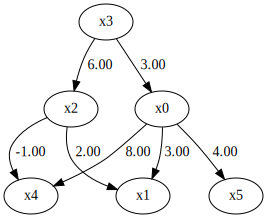

In [4]:
m = np.array(
    [
        [0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
        [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [8.0, 0.0, -1.0, 0.0, 0.0, 0.0],
        [4.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    ]
)

dot = make_dot(m)
dot

#### DirectLiNGAMで構造方程式モデルを推測

In [5]:
model = lingam.DirectLiNGAM()
model.fit(X)

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Stand

In [6]:
model.causal_order_

[3, 2, 0, 1, 4, 5]

In [7]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  2.863,  0.   ,  0.   ],
       [ 2.869,  0.   ,  2.074,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  5.715,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 7.937,  0.   , -0.982,  0.   ,  0.   ,  0.   ],
       [ 3.95 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

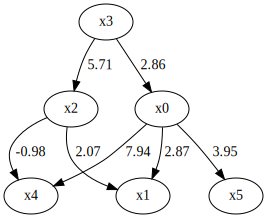

In [8]:
make_dot(model.adjacency_matrix_)

In [9]:
p_values = model.get_error_independence_p_values(X)
print(p_values)

[[0.    0.981 0.371 0.01  0.513 0.203]
 [0.981 0.    0.515 0.843 0.954 0.627]
 [0.371 0.515 0.    0.038 0.    0.138]
 [0.01  0.843 0.038 0.    0.023 0.011]
 [0.513 0.954 0.    0.023 0.    0.442]
 [0.203 0.627 0.138 0.011 0.442 0.   ]]
